In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# 读取图像
src_path = r"D:\MyProject\CV\CV2\logs-3.jpg"
src = cv.imread(src_path)
if src is None:
    raise FileNotFoundError(f"Image not found at {src_path}")
 
# 转换为RGB并应用双边滤波
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
src = cv.bilateralFilter(src, 9, 75, 75)

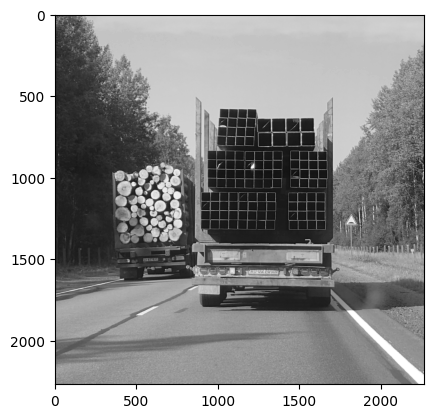

In [15]:
# 转换为灰度图并模糊处理 Преобразование в оттенки серого и размытие
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
gray = cv.blur(gray, (3, 3))
plt.imshow(gray, cmap='gray')
plt.show()

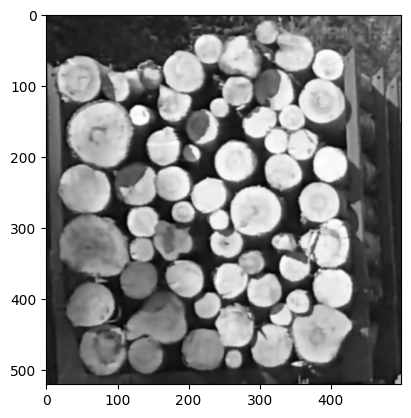

In [16]:
# 定义裁剪区域 Определите область обрезки
size1, size2 = 500, 520
x1, y1 = 350, 900
x2, y2 = x1 + size1, y1 + size2
cut = gray[y1:y2, x1:x2]
 
plt.imshow(cut, cmap='gray')
plt.show()

In [17]:
# 使用Hough变换检测圆形 Определение окружностей с помощью преобразования Хафа
detected_circles = cv.HoughCircles(
    cut,
    cv.HOUGH_GRADIENT,
    dp=1.7,  # 累加器分辨率与图像分辨率的反比
    minDist=25,  # 检测圆心之间的最小距离
    param1=260,  # Canny边缘检测的高阈值
    param2=0.6,  # 圆心检测阈值，阈值越低，能检测到的圆越多
    minRadius=10,
    maxRadius=100
)

Total pipes:  292


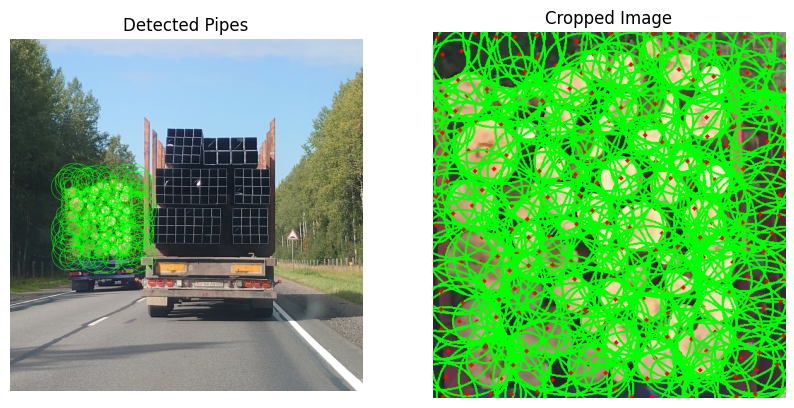

In [ ]:
# 处理检测结果 Обработка результатов тестирования
image = src.copy()
pipes_count = 0
 
if detected_circles is not None:
    detected_circles = np.round(detected_circles[0, :]).astype("int")
    for (x, y, r) in detected_circles:
        center = (x + x1, y + y1)
        cv.circle(image, center, r, (0, 255, 0), 2)
        cv.circle(image, center, 2, (255, 0, 0), 3)
        pipes_count += 1
 
print("Total pipes: ", pipes_count)
 
# 显示结果
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image)
axs[0].set_title('Detected Pipes')
axs[0].axis('off')
 
cut1 = image[y1:y2, x1:x2]
axs[1].imshow(cut1, cmap='gray')
axs[1].set_title('Cropped Image')
axs[1].axis('off')
plt.show()